<a href="https://colab.research.google.com/github/profitmonk/TA-Lib.github.io/blob/main/Transformers_vs_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

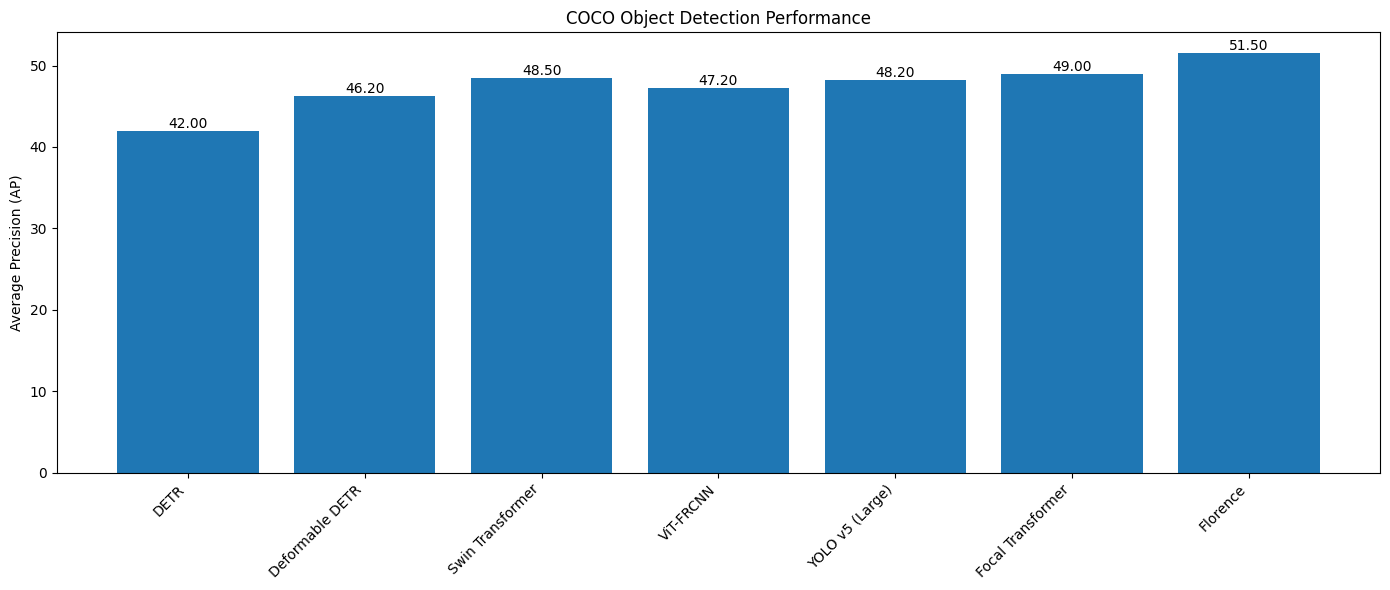

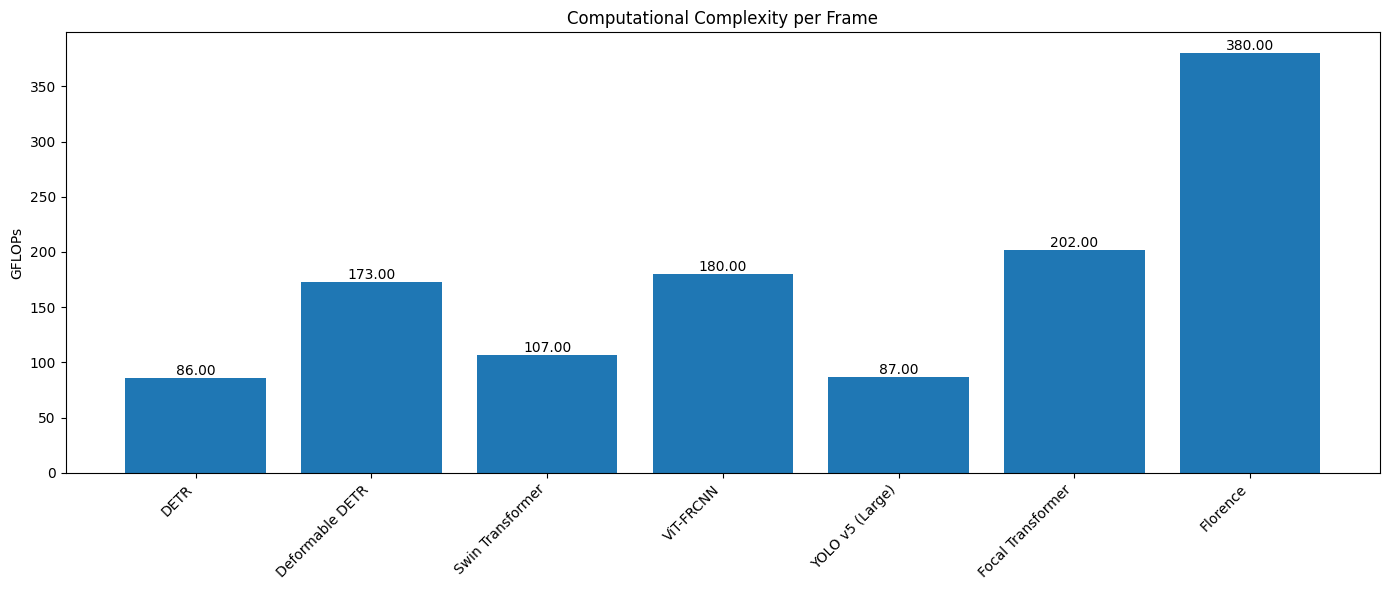

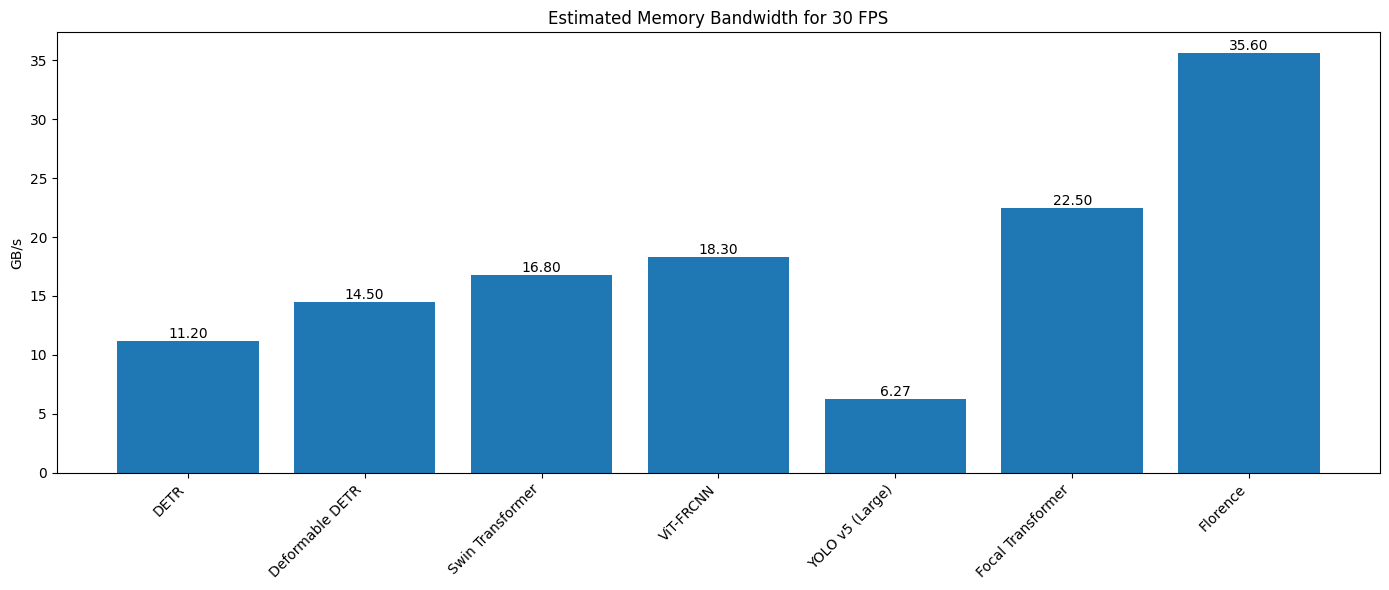


Summary Table:
Model                   AP     FLOPs/frame     Est MemBW (GB/s)
-----------------------------------------------------------------
DETR                  42.0              86                11.20
Deformable DETR       46.2             173                14.50
Swin Transformer      48.5             107                16.80
ViT-FRCNN             47.2             180                18.30
YOLO v5 (Large)       48.2              87                 6.27
Focal Transformer     49.0             202                22.50
Florence              51.5             380                35.60

Estimated requirements for a 6-camera system (30 FPS each):
DETR                 15.48 TFLOPs/s   67.20 GB/s
Deformable DETR      31.14 TFLOPs/s   87.00 GB/s
Swin Transformer     19.26 TFLOPs/s  100.80 GB/s
ViT-FRCNN            32.40 TFLOPs/s  109.80 GB/s
YOLO v5 (Large)      15.66 TFLOPs/s   37.62 GB/s
Focal Transformer    36.36 TFLOPs/s  135.00 GB/s
Florence             68.40 TFLOPs/s  213.60 GB/s


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(data, metric_name, title, ylabel):
    models = list(data.keys())
    values = [d[metric_name] for d in data.values()]

    plt.figure(figsize=(14, 6))
    bars = plt.bar(models, values)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Data: Accuracy, FLOPs per frame, Estimated Memory Bandwidth
model_data = {
    'DETR': {'AP': 42.0, 'FLOPs': 86, 'EstMemBW': 11.2},
    'Deformable DETR': {'AP': 46.2, 'FLOPs': 173, 'EstMemBW': 14.5},
    'Swin Transformer': {'AP': 48.5, 'FLOPs': 107, 'EstMemBW': 16.8},
    'ViT-FRCNN': {'AP': 47.2, 'FLOPs': 180, 'EstMemBW': 18.3},
    'YOLO v5 (Large)': {'AP': 48.2, 'FLOPs': 87, 'EstMemBW': 6.27},
    'Focal Transformer': {'AP': 49.0, 'FLOPs': 202, 'EstMemBW': 22.5},
    'Florence': {'AP': 51.5, 'FLOPs': 380, 'EstMemBW': 35.6}
}

# Plotting
plot_comparison(model_data, 'AP', 'COCO Object Detection Performance', 'Average Precision (AP)')
plot_comparison(model_data, 'FLOPs', 'Computational Complexity per Frame', 'GFLOPs')
plot_comparison(model_data, 'EstMemBW', 'Estimated Memory Bandwidth for 30 FPS', 'GB/s')

# Print summary table
print("\nSummary Table:")
print(f"{'Model':<20} {'AP':>5} {'FLOPs/frame':>15} {'Est MemBW (GB/s)':>20}")
print("-" * 65)
for model, data in model_data.items():
    print(f"{model:<20} {data['AP']:5.1f} {data['FLOPs']:15d} {data['EstMemBW']:20.2f}")

# Calculate and print total requirements for a 6-camera system
print("\nEstimated requirements for a 6-camera system (30 FPS each):")
for model, data in model_data.items():
    total_flops = data['FLOPs'] * 6 * 30 / 1000  # TFLOPs/s
    total_bw = data['EstMemBW'] * 6
    print(f"{model:<20} {total_flops:5.2f} TFLOPs/s  {total_bw:6.2f} GB/s")